<a href="https://colab.research.google.com/github/victormazevedo/predict-financial-fraud/blob/master/Predict_Financial_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Financial Fraud with Data Science Analysis

This is a final-project destinated to Analise e Densenvolvimento de Sistema's course of Fatec Ribeirão Preto

O seguinte projeto é destinado ao trabalho de conclusão de curso do curso de Análise e Desenvolvimento de Sistemas da Fatec Ribeirão Preto. O tema deste projeto é Detecção Automática de Fraude Financeira utilizando Data Science.

Para isto, utilizarei um dataset presente no site [Kaggle](https://kaggle.com).

## Import do dataset



In [1]:
import pandas as pd
!wget 'https://www.dropbox.com/s/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv?dl=0'
df = pd.read_csv('PS_20174392719_1491204439457_log.csv?dl=0')

--2020-03-25 22:15:22--  https://www.dropbox.com/s/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv [following]
--2020-03-25 22:15:23--  https://www.dropbox.com/s/raw/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc217cca06e50aba1f82058600cb.dl.dropboxusercontent.com/cd/0/inline/A0kqxEBT2xl-1Rcs3_q09255P2gSZiNvlmEm3bomKSNxlF447QZJfIBtsNVN7H3c9RgvLzVwt3DsfYhMwKq-tDJKdsUtNdLUaptbivZ86szicjjj3caU9LtMURRUI-yaytk/file# [following]
--2020-03-25 22:15:23--  https://uc217cca06e50aba1f82058600cb.dl.dropboxusercontent.com/cd/0/inline/A0kqxEBT2xl-1Rcs3_q09255P2gSZiNvlmEm3

In [2]:
  df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Explicando cada coluna e seus dados

Ao executar o _info_, conseguimos visualizar

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [4]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#verifying if exists null values in dataframe
df.isna().values.any()
df.isna().sum(0).sort_values(ascending = False)

isFlaggedFraud    0
isFraud           0
newBalanceDest    0
oldBalanceDest    0
nameDest          0
newBalanceOrig    0
oldBalanceOrig    0
nameOrig          0
amount            0
type              0
step              0
dtype: int64

## Explorando e Analisando os dados

In [8]:
print("Os tipos de transações fraudulentas são: {} ".format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))
fraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
fraudCashOut = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print("O número de TRANSFERS fraudulentas é: {}".format(len(fraudTransfer)))
print("O número de CASH_OUT(SAQUES) é: {}".format(len(fraudCashOut)))

Os tipos de transações fraudulentas são: ['TRANSFER', 'CASH_OUT'] 
O número de TRANSFERS fraudulentas é: 4097
O número de CASH_OUT(SAQUES) é: 4116


In [23]:
countIsFlaggedFraud = df.loc[(df.isFlaggedFraud == 1)]
print("O número de transações marcadas como isFlaggedFraud é: {} ".format(len(countIsFlaggedFraud)))

print("O tipo de transações que estão flagadas com isFlaggedFraud é: {}".format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))

dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\nValor minimo transacionado quando a flag esta ativa: ${}'.format(dfFlagged.amount.min()))
print('\nValor maximo quando a flag estava inativa: ${}'.format(dfNotFlagged.amount.max()))

O número de transações marcadas como isFlaggedFraud é: 16 
O tipo de transações que estão flagadas com isFlaggedFraud é: ['TRANSFER']

Valor minimo transacionado quando a flag esta ativa: $353874.22

Valor maximo quando a flag estava inativa: $92445516.64


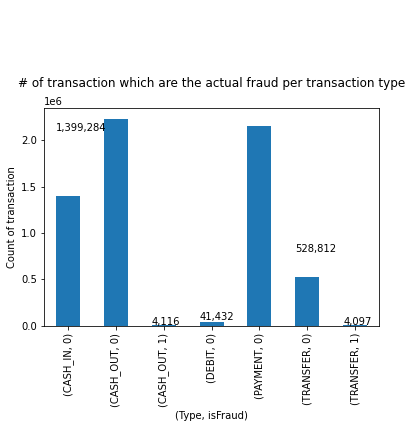

In [29]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type\n")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.50, p.get))